In [1]:
import numpy as np
import easing as easing
import pandas as pd

In [3]:

data=np.array(([0,1,0,1,0,1,0,1,0,1],[0,1,0,1,0,1,0,1,0,1])).T
time=np.arange(np.shape(data)[0])

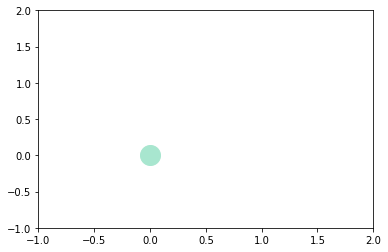

In [5]:
easing.Eased(data,time).scatter_animation2d(n=5,smoothness=40,speed=0.5,gif=False)

#### data=np.array(([0,1,0,1,0,1,0,1,0,1],[0,1,0,1,0,1,0,1,0,1]))


In [3]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],'num_wings': [2, 0, 0, 0],'num_specimen_seen': [10, 2, 1, 8]},index=['falcon', 'dog', 'spider', 'fish'])

In [23]:
df = pd.DataFrame({'num_legs': [2, 4, 8, 0],'num_wings': [2, 0, 0, 0],'num_specimen_seen': [10, 2, 1, 8]},index=['falcon', 'dog', 'spider', 'fish'])

(2, 10)

In [8]:
df = pd.DataFrame({'num_legs': np.sin(np.linspace(0,2*np.pi,10)),'num_wings': np.cos(np.linspace(0,2*np.pi,10))})





In [9]:
df

,num_legs,num_wings
0,0.000000e+00,1.000000
1,6.427876e-01,0.766044
2,9.848078e-01,0.173648
3,8.660254e-01,-0.500000
4,3.420201e-01,-0.939693
5,-3.420201e-01,-0.939693
6,-8.660254e-01,-0.500000
7,-9.848078e-01,0.173648
8,-6.427876e-01,0.766044
9,-2.449294e-16,1.000000


In [12]:
np.vstack((np.random.random(size=5),np.random.random(size=5),np.random.random(size=5),np.random.random(size=5)))


array([[0.3633114 , 0.40243556, 0.53103731, 0.76535386, 0.68421387],
       [0.42691554, 0.91649201, 0.486665  , 0.24700751, 0.91871702]])